In [5]:
import pandas as pd
import os

In [20]:
# inputs
main_dir = "wsj"
ner_mapped = "mapped_gemma"
parent_dir = os.path.dirname(os.getcwd())

In [ ]:
df_1 = pd.DataFrame()
for filename in os.listdir(os.path.join(main_dir, ner_mapped)):

    df_new = pd.read_csv(os.path.join(main_dir, ner_mapped, filename))
    df_new = df_new.loc[pd.notnull(df_new['Company_name_mapped'])]
    df_1  = pd.concat([df_1, df_new], axis=0)

df_1 ['u3_num'] = df_1 ['u3_num'].astype(int).astype(str)

In [7]:
# EDA on the video data collected from the channel
df_3 = pd.read_csv(os.path.join(parent_dir, "channel_scraper", f"{main_dir}_DB.csv"))
df_3['date_published'] = pd.to_datetime(df_3['date_published'], format='%Y-%m-%dT%H:%M:%SZ') 
print(f"Total videos: {len(df_3)}")
df_3.groupby(df_3.date_published.dt.year)['vid_id'].count()

Total videos: 24199


date_published
2008     450
2009      62
2011     189
2012    4923
2013    3670
2014    3520
2015    3654
2016    4113
2017    1701
2018     304
2019     224
2020     281
2021     278
2022     331
2023     412
2024      87
Name: vid_id, dtype: int64

In [8]:
df_1

,vid_id,company_found_gemma,Company_name_mapped,u3_num
0,eKQ0sCgcsIc,Alcoa (Aluminum manufacturing),Alcoa Corp,194737
1,eKQ0sCgcsIc,US companies (Various industries),US 1 Industries Inc,28230
3,eKQ0sCgcsIc,HP (Computer hardware and software),HP Inc,27582
4,eKQ0sCgcsIc,eBay (E-commerce),eBay Inc,44584
5,eKQ0sCgcsIc,PayPal (Financial services),PayPal Inc,36173
...,...,...,...,...
14,4BRR9dcV0NE,Patron (Spirits & Liqueurs),Patron Systems Inc,44971
16,4BRR9dcV0NE,Roller Mill (Spirits & Liqueurs),Kovilpatti Lakshmi Roller Flour Mills Ltd,14722
18,IuxKKvuG_94,Porton ( Brandy),Porton Pharma Solutions Ltd,164014
21,u6-7M5fxPvQ,wsj (Media),WJ Communications,36772


In [9]:
df_1.loc[df_1['company_found_gemma'].str.contains("American A")]

,vid_id,company_found_gemma,Company_name_mapped,u3_num
4,422kBOP-EAo,American Airlines - Airline,American Airlines Group Inc,27053
61,mU1csl3R9eU,American Airlines (Airline),American Airlines Group Inc,27053
25,iPxthIFlGco,American Airlines (Airline),American Airlines Group Inc,27053
5,635iZPETnEo,American Airlines (Airline),American Airlines Group Inc,27053
4,d0VNeGiZjoI,American Airlines (Airline),American Airlines Group Inc,27053
...,...,...,...,...
5,PUr1fekPcBg,American Airlines (Airline),American Airlines Group Inc,27053
12,ZWEwgsKb690,American Airlines (Airline),American Airlines Group Inc,27053
5,qFWkLLOXoIQ,American Airlines - Airline,American Airlines Group Inc,27053
23,d8NsqRyl-n4,American Airlines (Airline),American Airlines Group Inc,27053


In [10]:
df_1.loc[df_1['Company_name_mapped'].str.contains("American A")]

,vid_id,company_found_gemma,Company_name_mapped,u3_num
4,422kBOP-EAo,American Airlines - Airline,American Airlines Group Inc,27053
61,mU1csl3R9eU,American Airlines (Airline),American Airlines Group Inc,27053
25,iPxthIFlGco,American Airlines (Airline),American Airlines Group Inc,27053
5,635iZPETnEo,American Airlines (Airline),American Airlines Group Inc,27053
4,d0VNeGiZjoI,American Airlines (Airline),American Airlines Group Inc,27053
...,...,...,...,...
5,PUr1fekPcBg,American Airlines (Airline),American Airlines Group Inc,27053
12,ZWEwgsKb690,American Airlines (Airline),American Airlines Group Inc,27053
5,qFWkLLOXoIQ,American Airlines - Airline,American Airlines Group Inc,27053
23,d8NsqRyl-n4,American Airlines (Airline),American Airlines Group Inc,27053


In [11]:
# Get top most mentioned companies

def compute_entity_frequency(df, top_k=35):
    values = df['Company_name_mapped'].value_counts().keys().tolist()
    counts = df['Company_name_mapped'].value_counts().tolist()

    for i, (value, count) in enumerate(zip(values, counts)):
        if i == top_k:
            break
        print(value, count)

compute_entity_frequency(df_1)

Apple Inc 849
Wall Street Media Co Inc 824
Wall Street Finance & Secs 683
Google Inc 662
Amazon.com Inc 405
WJ Communications 361
SOCIAL MEDIA GROUP 304
Microsoft Corp 300
Samsung Electronics Co Ltd 285
Twitter Inc 203
Netflix Inc 183
Goldman Sachs Group Inc/The 138
Ford Motor Co 132
Walt Disney Co/The 126
MarketWatch Inc 125
News Communications & Media PLC 119
General Motors Co 118
Tesla Inc 116
Walmart Inc 115
Verizon Communications Inc 105
Sony Group Corp 92
Morgan Stanley 83
McDonald's Corp 78
NBC Internet Inc 77
JP Morgan & Co Inc 75
HBO & Co 74
Uber Technologies Inc 72
Wall Street Finance Ltd 71
CBS Inc 68
Target Corp 67
Delta Air Lines Inc 67
ABC Co Ltd 66
Toyota Auto Body Co Ltd 65
Chrysler Corp 64
BMW Industries Ltd 62


In [12]:
# how many belonging to the 5 focal firms?

u3_ids = ['31689','27053', '27465', '34793', '204165']
#u3_ids = ['28390']
u3_ids = ['27053']
#names = ['SVB', 'AA', 'Ford', 'NYCB', 'Wework']

df_1.loc[df_1['u3_num'].isin(u3_ids)]

,vid_id,company_found_gemma,Company_name_mapped,u3_num
4,422kBOP-EAo,American Airlines - Airline,American Airlines Group Inc,27053
61,mU1csl3R9eU,American Airlines (Airline),American Airlines Group Inc,27053
25,iPxthIFlGco,American Airlines (Airline),American Airlines Group Inc,27053
5,635iZPETnEo,American Airlines (Airline),American Airlines Group Inc,27053
4,d0VNeGiZjoI,American Airlines (Airline),American Airlines Group Inc,27053
...,...,...,...,...
5,PUr1fekPcBg,American Airlines (Airline),American Airlines Group Inc,27053
12,ZWEwgsKb690,American Airlines (Airline),American Airlines Group Inc,27053
5,qFWkLLOXoIQ,American Airlines - Airline,American Airlines Group Inc,27053
23,d8NsqRyl-n4,American Airlines (Airline),American Airlines Group Inc,27053


In [13]:
# aggregate by month and plot frequency of mentions

def plot_frequency_of_mentions_year_month(company_name="American Airlines", metadata_filename=f'{main_dir}_DB.csv', figsize=(16,10)):

    df_2 = df_1.loc[df_1['Company_name_mapped'].str.contains(company_name)]
    df_3 = pd.read_csv(os.path.join(parent_dir, "channel_scraper", metadata_filename))
    df_3['date_published'] = pd.to_datetime(df_3['date_published'])

    df_merged = pd.merge(left=df_2, right=df_3[['vid_id', 'title', 'date_published']], on='vid_id')
    df_merged['month'] = df_merged.date_published.dt.month
    df_merged['year'] = df_merged.date_published.dt.year
    df_aggr = df_merged.groupby(['year', 'month'], as_index=False)['vid_id'].count()
    df_aggr['year_month'] = df_aggr['year'].astype(str) + '_' + df_aggr['month'].astype(str)

    df_aggr.plot(x='year_month', y='vid_id', kind='bar', figsize=figsize)

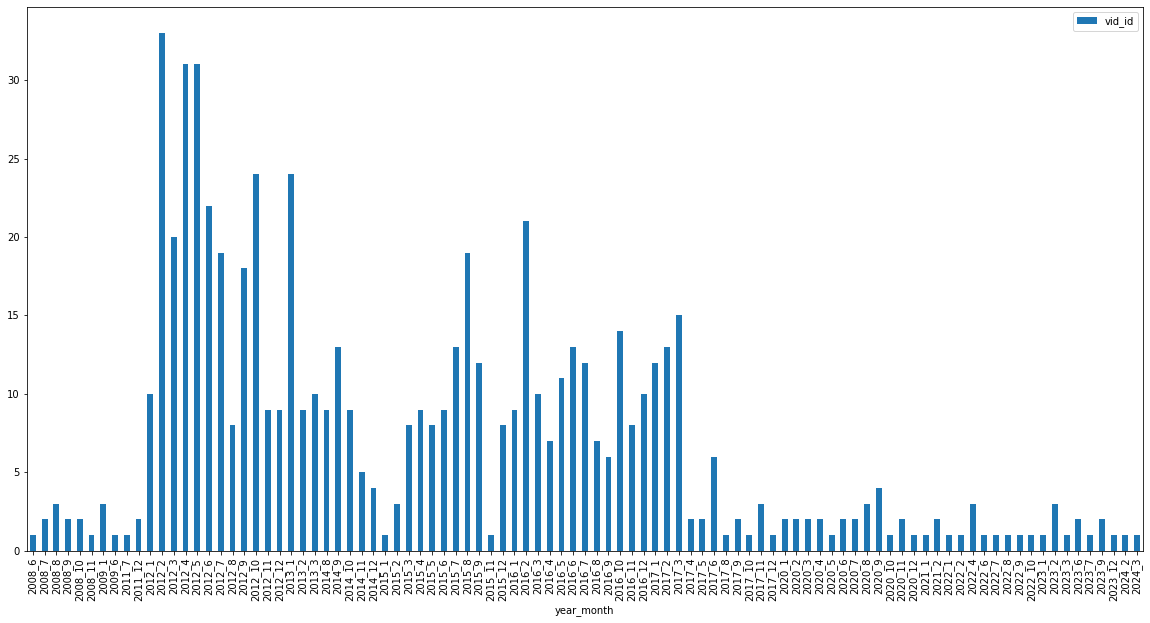

In [14]:
plot_frequency_of_mentions_year_month(company_name="Google", metadata_filename='wsj_DB.csv', figsize=(20,10))

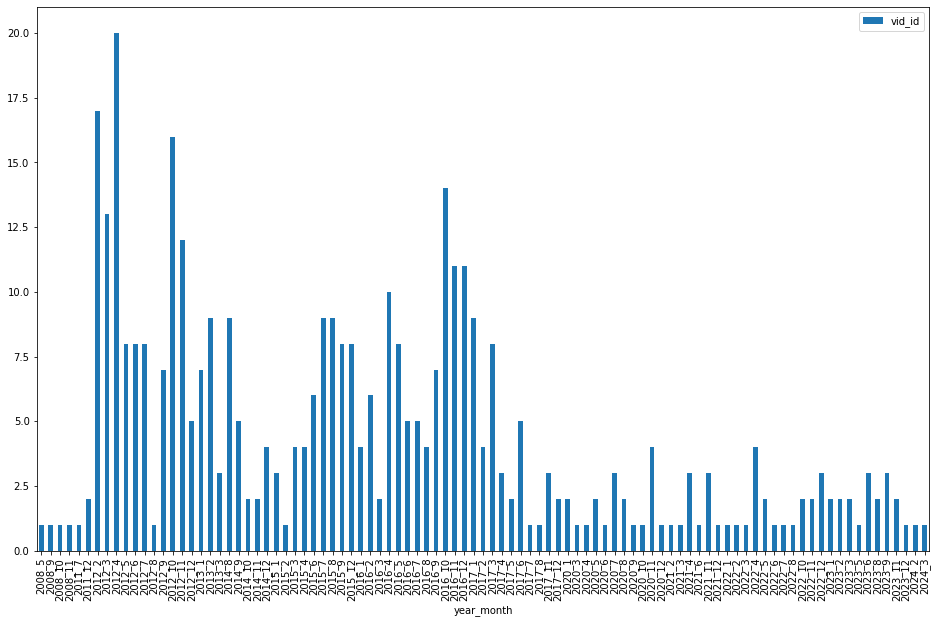

In [19]:
plot_frequency_of_mentions_year_month(company_name="Amazon", metadata_filename=f'{main_dir}_DB.csv', figsize=(16,10))

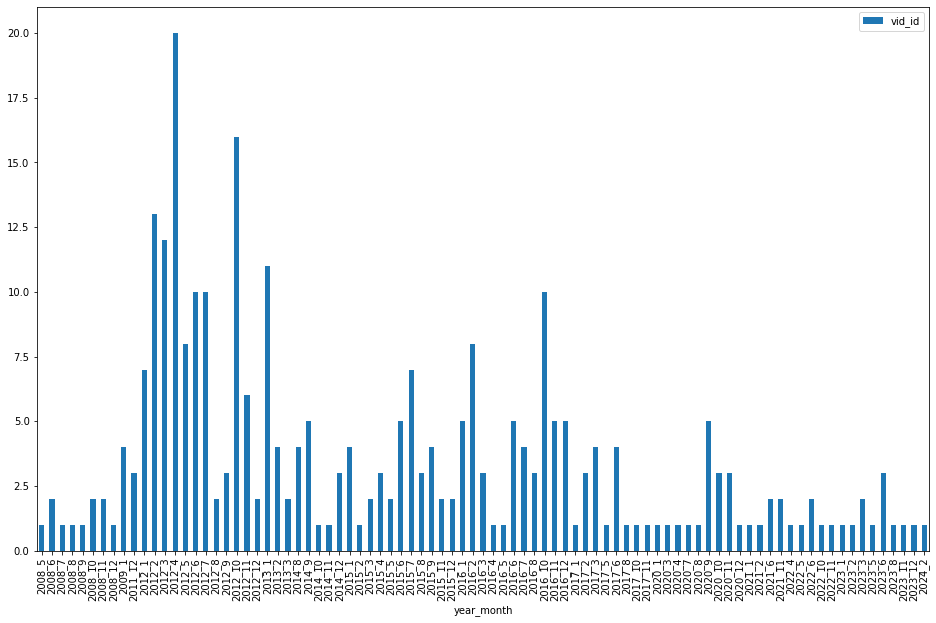

In [17]:
plot_frequency_of_mentions_year_month(company_name="Microsoft Corp", metadata_filename='wsj_DB.csv', figsize=(16,10))

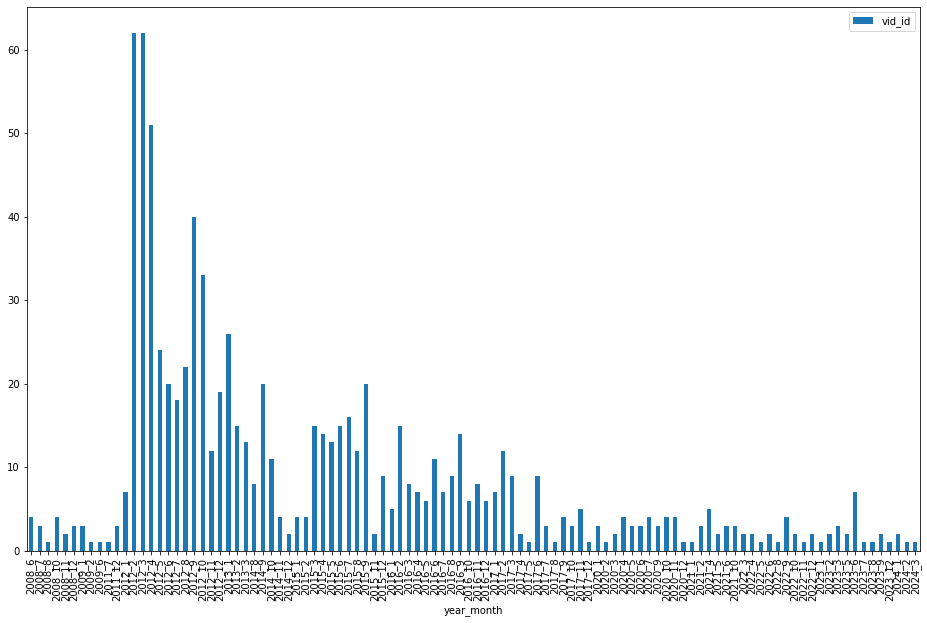

In [18]:
plot_frequency_of_mentions_year_month(company_name="Apple", metadata_filename=f'{main_dir}_DB.csv', figsize=(16,10))